# Pollution Level Categorization using KNN
This notebook loads the dataset, shows exploratory graphs, and contains a full KNN training pipeline (GridSearch) -- training cell may take time on large datasets.

Loaded dataset shape: (5000, 10)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


Chosen features: ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Humidity', 'Temperature']


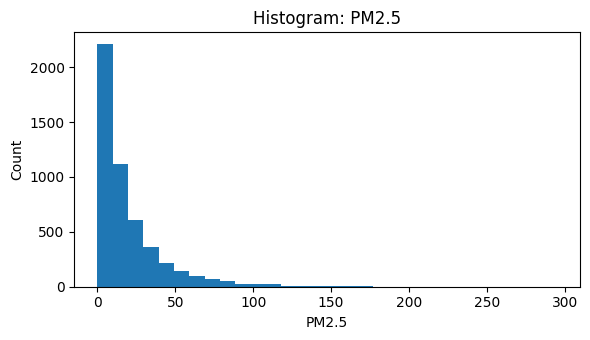

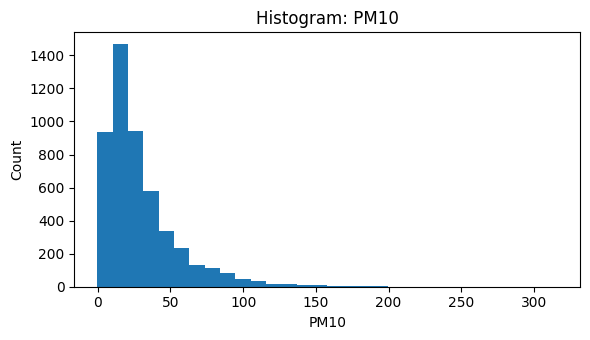

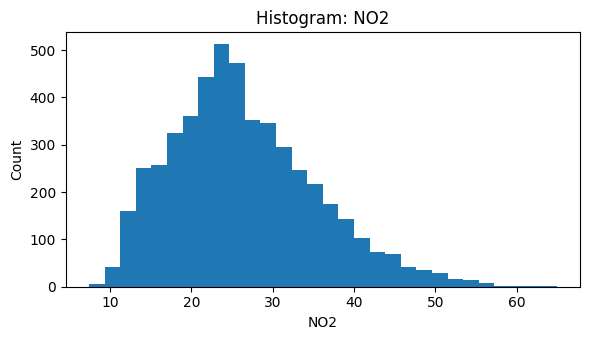

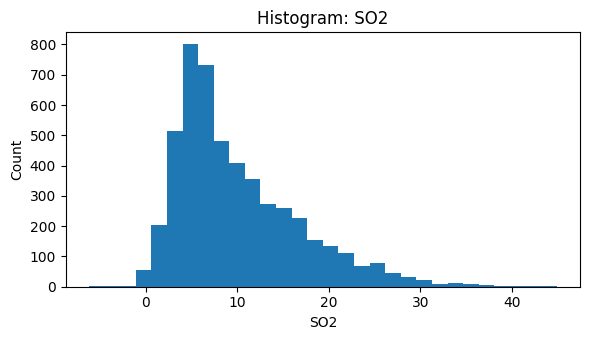

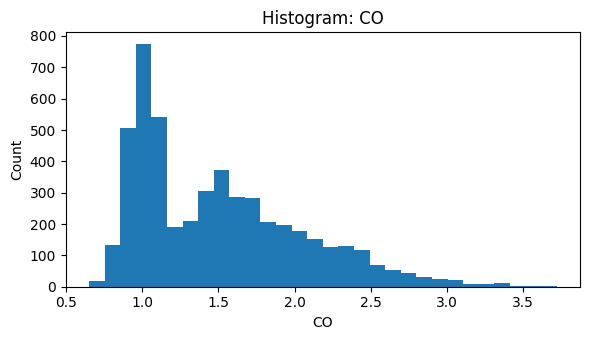

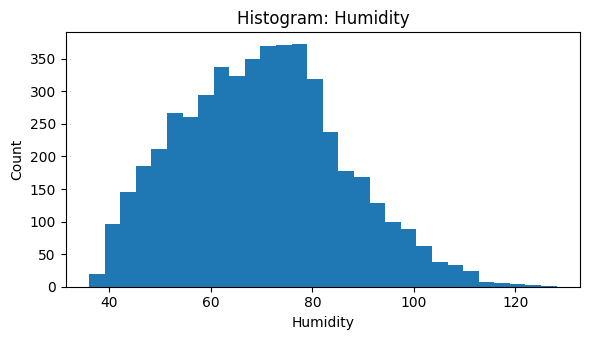

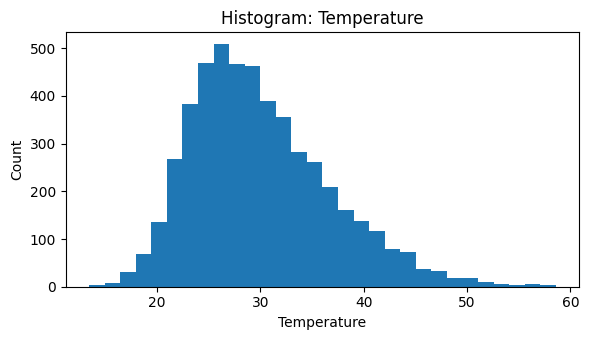

<Figure size 1000x1000 with 0 Axes>

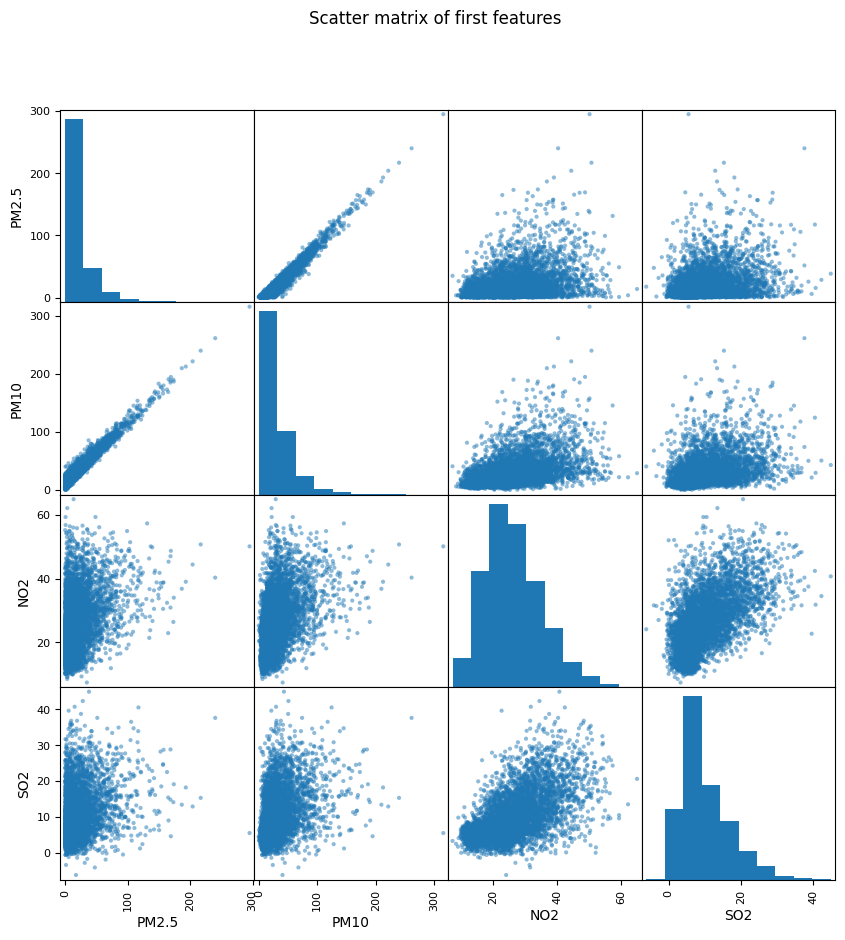

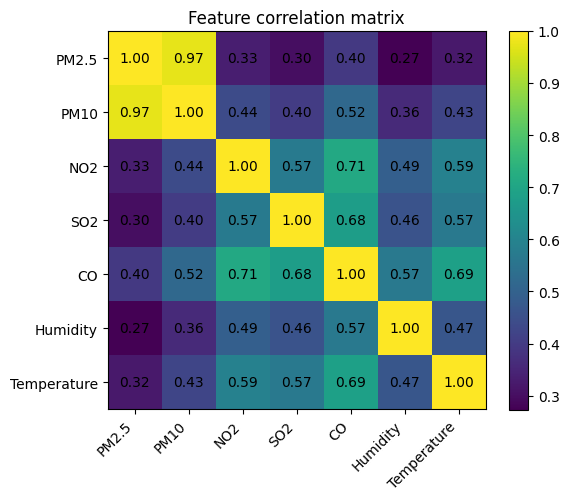

In [2]:
# Lightweight exploratory analysis (histograms, scatter matrix, correlation heatmap)
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

DATA_PATH = "updated_pollution_dataset.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Dataset not found at " + DATA_PATH)

df = pd.read_csv(DATA_PATH)
print("Loaded dataset shape:", df.shape)
display(df.head())

# Auto-select numeric pollution-related features
candidate_features = ['PM2.5','PM2_5','PM25','PM10','NO2','NO_2','SO2','SO_2','CO','O3','O_3','AQI','Humidity','Temperature','RH','Temp']
lower_map = {c.lower(): c for c in df.columns}
chosen_features = []
for cand in candidate_features:
    key = cand.lower()
    if key in lower_map:
        chosen_features.append(lower_map[key])
if len(chosen_features) == 0:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    exclude = [c for c in numeric_cols if 'id' in c.lower() or 'time' in c.lower() or 'date' in c.lower()]
    chosen_features = [c for c in numeric_cols if c not in exclude]
print("Chosen features:", chosen_features)

# Prepare data for plots
features = chosen_features[:8]  # limit to first 8 for plotting clarity
X = df[features]

# Histograms
for col in features:
    plt.figure(figsize=(6,3.5))
    plt.hist(X[col].dropna(), bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Scatter matrix for first up to 4 features
sm_features = features[:4]
if len(sm_features) >= 2:
    plt.figure(figsize=(10,10))
    scatter_matrix(X[sm_features].dropna(), diagonal='hist', figsize=(10,10))
    plt.suptitle('Scatter matrix of first features')
    plt.show()

# Correlation heatmap (using matplotlib imshow)
corr = X.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.title('Feature correlation matrix')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center')
plt.tight_layout()
plt.show()


In [ ]:
# Full training pipeline (GridSearch). This cell may take time on large datasets.
# Uncomment and run when ready.

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import joblib
# DATA_PATH = "/mnt/data/updated_pollution_dataset.csv"
# df = pd.read_csv(DATA_PATH)
# -- (full training code as provided earlier) --
# Save model to /mnt/data/knn_pollution_model.joblib
